# 11-1 : moons 데이터셋 이용해서 SVC 학습

1) rbf 커널, gamma = 5, C = 0.1

2) rbf 커널, gamma = 0.5, C = 0.1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.svm import SVC

In [3]:
X_moon, y_moon = make_moons(n_samples = 1000,
                            shuffle = True,
                            noise = 0.15,
                            random_state = 20152410)

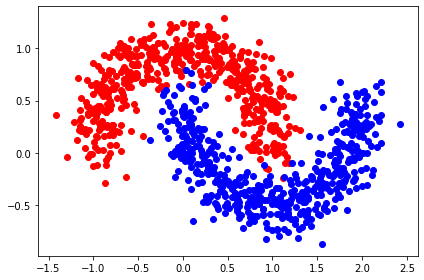

In [4]:
plt.figure(figsize = (6, 4))
plt.plot(X_moon[np.where(y_moon == 0)[0], 0], X_moon[np.where(y_moon == 0)[0], 1], 'ro')
plt.plot(X_moon[np.where(y_moon == 1)[0], 0], X_moon[np.where(y_moon == 1)[0], 1], 'bo')
plt.tight_layout()
plt.show()

In [5]:
moon_model1 = SVC(kernel = 'rbf', gamma = 5, C = 0.1)
moon_model2 = SVC(kernel = 'rbf', gamma = 0.5, C = 0.1)

moon_cv_accuracy_score = [cross_val_score(moon_model1,
                                          X = X_moon,
                                          y = y_moon,
                                          cv = 5,
                                          scoring = make_scorer(accuracy_score)),
                          cross_val_score(moon_model2,
                                          X = X_moon,
                                          y = y_moon,
                                          cv = 5,
                                          scoring = make_scorer(accuracy_score))]

In [6]:
for index, value in enumerate(moon_cv_accuracy_score):
    print("모델 {}번의 CV accuracy score : {}, 평균 성능 : {}".format(index + 1, value, value.mean()))

모델 1번의 CV accuracy score : [0.985 0.98  0.985 0.995 0.975], 평균 성능 : 0.984
모델 2번의 CV accuracy score : [0.94  0.905 0.925 0.96  0.92 ], 평균 성능 : 0.93


CV 성능이 더 좋은 1번 모델 학습 후 결과 시각화

In [7]:
moon_model1.fit(X_moon, y_moon)
moon_model2.fit(X_moon, y_moon)

print("모델 1번의 train accuracy score : {}".format(accuracy_score(y_moon, moon_model1.predict(X_moon))))
print("모델 2번의 train accuracy score : {}".format(accuracy_score(y_moon, moon_model2.predict(X_moon))))

모델 1번의 train accuracy score : 0.986
모델 2번의 train accuracy score : 0.936


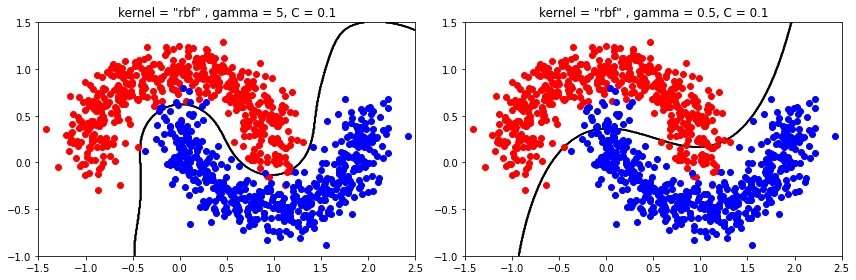

In [8]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(X_moon[np.where(y_moon == 0)[0], 0], X_moon[np.where(y_moon == 0)[0], 1], 'ro')
plt.plot(X_moon[np.where(y_moon == 1)[0], 0], X_moon[np.where(y_moon == 1)[0], 1], 'bo')

x1, x2 = np.meshgrid(np.linspace(-1.5, 2.5, 500), np.linspace(-1, 1.5, 500))
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = moon_model1.predict(X_new).reshape(x1.shape)
plt.contour(x1, x2, y_pred, colors = 'k', alpha = 0.5)

plt.title('kernel = "rbf" , gamma = 5, C = 0.1')

plt.subplot(1, 2, 2)
plt.plot(X_moon[np.where(y_moon == 0)[0], 0], X_moon[np.where(y_moon == 0)[0], 1], 'ro')
plt.plot(X_moon[np.where(y_moon == 1)[0], 0], X_moon[np.where(y_moon == 1)[0], 1], 'bo')

x1, x2 = np.meshgrid(np.linspace(-1.5, 2.5, 500), np.linspace(-1, 1.5, 500))
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = moon_model2.predict(X_new).reshape(x1.shape)
plt.contour(x1, x2, y_pred, colors = 'k', alpha = 0.5)

plt.title('kernel = "rbf" , gamma = 0.5, C = 0.1')

plt.tight_layout()
plt.show()

1번 모델의 gamma가 더 높기 때문에 오분류가 덜 되도록 모델을 학습했다

CV accuracy score가 더 높고, 시각적으로 봤을 때도 오분류된 케이스가 적기때문에 더 좋은 모델이라고 평가할 수 있다

# 11-2 : iris dataset을 이용해 SVC 학습

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
X_iris = iris.data[:, 2:4]
y_iris = iris.target

In [12]:
iris_model1 = SVC(kernel = 'rbf', gamma = 0.7, C = 1)
iris_model2 = SVC(kernel = 'linear', C = 1)
iris_model3 = SVC(kernel = 'poly', degree = 3, gamma = 'auto', C = 1)

iris_cv_accuracy_score = [cross_val_score(iris_model1,
                                          X = X_iris,
                                          y = y_iris,
                                          cv = 5,
                                          scoring = make_scorer(accuracy_score)),
                          cross_val_score(iris_model2,
                                          X = X_iris,
                                          y = y_iris,
                                          cv = 5,
                                          scoring = make_scorer(accuracy_score)),
                          cross_val_score(iris_model3,
                                          X = X_iris,
                                          y = y_iris,
                                          cv = 5,
                                          scoring = make_scorer(accuracy_score))]

In [13]:
for index, value in enumerate(iris_cv_accuracy_score):
    print("모델 {}번의 CV accuracy score : {}, 평균 성능 : {}".format(index + 1, value, value.mean()))

모델 1번의 CV accuracy score : [0.96666667 0.96666667 0.93333333 0.93333333 1.        ], 평균 성능 : 0.96
모델 2번의 CV accuracy score : [0.96666667 0.96666667 0.93333333 0.93333333 1.        ], 평균 성능 : 0.96
모델 3번의 CV accuracy score : [0.96666667 0.96666667 0.93333333 0.93333333 1.        ], 평균 성능 : 0.96


In [14]:
iris_model1.fit(X_iris, y_iris)
iris_model2.fit(X_iris, y_iris)
iris_model3.fit(X_iris, y_iris)

iris_pred1 = iris_model1.predict(X_iris)
iris_pred2 = iris_model2.predict(X_iris)
iris_pred3 = iris_model3.predict(X_iris)

print("모델 1번의 train accuracy score : {}".format(accuracy_score(y_iris, iris_pred1)))
print("모델 2번의 train accuracy score : {}".format(accuracy_score(y_iris, iris_pred2)))
print("모델 3번의 train accuracy score : {}".format(accuracy_score(y_iris, iris_pred3)))

모델 1번의 train accuracy score : 0.9666666666666667
모델 2번의 train accuracy score : 0.9666666666666667
모델 3번의 train accuracy score : 0.96


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

print("모델 1번 : kernel = 'rbf', gamma = 0.7, C = 1")
print(confusion_matrix(y_iris, iris_pred1))
print(classification_report(y_iris, iris_pred1))

print("모델 2번 : kernel = 'linear', C = 1")
print(confusion_matrix(y_iris, iris_pred2))
print(classification_report(y_iris, iris_pred2))

print("모델 3번 : kernel = 'poly', degree = 3, gamma = 'auto', C = 1")
print(confusion_matrix(y_iris, iris_pred3))
print(classification_report(y_iris, iris_pred3))

모델 1번 : kernel = 'rbf', gamma = 0.7, C = 1
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

모델 2번 : kernel = 'linear', C = 1
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

모델 3번 : kernel = 'poly', degree = 3, gamma = 'auto', C = 1
[[50  0  0]
 [ 0 47  3]
 [ 0 

# 11-3 : mnist 데이터를 이용해 SVC 학습

In [16]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [17]:
def mnist_stratified_sampling(target):
    '''각 숫자별로 550개씩 총 5500개 샘플 추출'''
    np.random.seed(20152410)
    index_list = [np.random.permutation(np.where(target == i)[0])[:550]
                  for i in range(10)]
    index = np.concatenate(index_list)
    
    return index

X = mnist['data']
y = mnist["target"].astype(np.int)

sample_index = mnist_stratified_sampling(y)
X_small = X[sample_index] / 255
y_small = y[sample_index]

from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits = 11)

for train_index, test_index in stratified_kfold.split(X_small, y_small):
    # train : 5000, test : 500
    X_train, X_test = X_small[train_index], X_small[test_index]
    y_train, y_test = y_small[train_index], y_small[test_index]

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5000, 784), (500, 784), (5000,), (500,))

In [19]:
mnist_model1 = SVC(kernel = 'rbf', gamma = 1, C = 1)
mnist_model2 = SVC(kernel = 'rbf', gamma = 'auto', C = 1)
mnist_model3 = SVC(kernel = 'rbf', gamma = 1, C = 10)
mnist_model4 = SVC(kernel = 'rbf', gamma = 'auto', C = 10)

mnist_model_list = [mnist_model1, mnist_model2, mnist_model3, mnist_model4]

In [20]:
mnist_cv_accuracy_score = [cross_val_score(model,
                                           X = X_train,
                                           y = y_train,
                                           cv = 4,
                                           scoring = make_scorer(accuracy_score)) for model in mnist_model_list]

In [21]:
for index, value in enumerate(mnist_cv_accuracy_score):
    print("모델 {}번의 CV accuracy score : {}, 평균 성능 : {}".format(index + 1, value, value.mean()))

모델 1번의 CV accuracy score : [0.1808 0.1656 0.1712 0.168 ], 평균 성능 : 0.1714
모델 2번의 CV accuracy score : [0.8984 0.8896 0.8992 0.9016], 평균 성능 : 0.8972
모델 3번의 CV accuracy score : [0.1944 0.1752 0.1792 0.1848], 평균 성능 : 0.18339999999999998
모델 4번의 CV accuracy score : [0.9272 0.924  0.9368 0.9256], 평균 성능 : 0.9283999999999999


mnist small 데이터에서 CV accuracy score가 가장 좋은 모델은 SVC(kernel = 'rbf', gamma = 'auto', C = 10)

In [22]:
mnist_model4.fit(X_train, y_train)
y_test_pred = mnist_model4.predict(X_test)

In [23]:
print("모델 3번 : kernel = 'rbf', gamma = 'auto', C = 10")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

모델 3번 : kernel = 'rbf', gamma = 'auto', C = 10
[[48  0  0  0  0  1  1  0  0  0]
 [ 0 48  0  0  0  0  1  0  1  0]
 [ 1  0 44  0  2  0  0  2  0  1]
 [ 0  2  3 39  0  5  0  1  0  0]
 [ 0  1  0  0 48  0  0  0  0  1]
 [ 1  0  0  2  0 44  0  1  2  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 1  0  0  0  0  0  0 48  0  1]
 [ 0  2  1  1  0  0  1  1 44  0]
 [ 0  0  0  0  0  0  1  1  0 48]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.91      0.96      0.93        50
           2       0.92      0.88      0.90        50
           3       0.93      0.78      0.85        50
           4       0.96      0.96      0.96        50
           5       0.88      0.88      0.88        50
           6       0.93      1.00      0.96        50
           7       0.89      0.96      0.92        50
           8       0.94      0.88      0.91        50
           9       0.94      0.96      0.95        50

    accuracy              

# 11-4 : breast cancer 데이터로 SVC 학습

In [24]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [25]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [26]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [27]:
X_bc = breast_cancer.data
y_bc = breast_cancer.target.astype(np.int)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bc,
                                                    y_bc,
                                                    train_size = 0.8,
                                                    stratify = y_bc,
                                                    random_state = 20152410)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_bc_scaled = scaler.fit_transform(X_train)

In [28]:
bc_model1 = SVC(kernel = 'rbf', gamma = 1, C = 1)
bc_model2 = SVC(kernel = 'rbf', gamma = 10, C = 1)
bc_model3 = SVC(kernel = 'rbf', gamma = 1, C = 10)
bc_model4 = SVC(kernel = 'rbf', gamma = 10, C = 10)
bc_model5 = SVC(kernel = 'rbf', gamma = 'auto', C = 0.1)
bc_model6 = SVC(kernel = 'rbf', gamma = 'auto', C = 1)
bc_model7 = SVC(kernel = 'rbf', gamma = 'auto', C = 10)
bc_model8 = SVC(kernel = 'rbf', gamma = 'scale', C = 10)
bc_model9 = SVC(kernel = 'rbf', gamma = 1/30, C = 10)
bc_model10 = SVC(kernel = 'rbf', gamma = 1/100, C = 1)
bc_model11 = SVC(kernel = 'rbf', gamma = 1/100, C = 10)

bc_model_list = [bc_model1, bc_model2, bc_model3, bc_model4, bc_model5,
                 bc_model6, bc_model7, bc_model8, bc_model9, bc_model10, bc_model11]

gamma를 'auto'나 'scale'로 하면 

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.로 설정됨

학습 결과 보니까 'scale'로 해도 1 / n_features랑 결과가 같네

In [29]:
bc_cv_accuracy_score = [cross_val_score(model,
                                        X = X_bc_scaled,
                                        y = y_train,
                                        cv = 5,
                                        scoring = make_scorer(accuracy_score)) for model in bc_model_list]

In [30]:
for index, value in enumerate(bc_cv_accuracy_score):
    print("모델 {}번의 CV accuracy score : {}, 평균 성능 : {}".format(index + 1, value, value.mean()))

모델 1번의 CV accuracy score : [0.62637363 0.62637363 0.63736264 0.63736264 0.62637363], 평균 성능 : 0.6307692307692307
모델 2번의 CV accuracy score : [0.62637363 0.62637363 0.62637363 0.62637363 0.62637363], 평균 성능 : 0.6263736263736264
모델 3번의 CV accuracy score : [0.62637363 0.62637363 0.63736264 0.63736264 0.62637363], 평균 성능 : 0.6307692307692307
모델 4번의 CV accuracy score : [0.62637363 0.62637363 0.62637363 0.62637363 0.62637363], 평균 성능 : 0.6263736263736264
모델 5번의 CV accuracy score : [0.92307692 0.96703297 0.95604396 0.93406593 0.92307692], 평균 성능 : 0.9406593406593406
모델 6번의 CV accuracy score : [0.95604396 0.98901099 0.97802198 0.95604396 0.96703297], 평균 성능 : 0.9692307692307693
모델 7번의 CV accuracy score : [0.98901099 0.98901099 0.94505495 0.94505495 0.97802198], 평균 성능 : 0.9692307692307693
모델 8번의 CV accuracy score : [0.98901099 0.98901099 0.94505495 0.94505495 0.97802198], 평균 성능 : 0.9692307692307693
모델 9번의 CV accuracy score : [0.98901099 0.98901099 0.94505495 0.94505495 0.97802198], 평균 성능 : 0.969230769

CV accuracy score가 가장 좋은 모델은 SVC(kernel = 'rbf', gamma = 1/100, C = 10) 모델

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
cv_sgc_accuracy_score = cross_val_score(sgd_clf,
                                        X = X_bc_scaled,
                                        y = y_train,
                                        cv = 5,
                                        scoring = make_scorer(accuracy_score))

print("SGDClassifier CV accuracy score : {}, 평균 성능 : {}".format(cv_sgc_accuracy_score, cv_sgc_accuracy_score.mean()))

SGDClassifier CV accuracy score : [0.97802198 0.96703297 0.96703297 0.92307692 0.95604396], 평균 성능 : 0.9582417582417582


SGDClassifier의 default 옵션 모델의 CV score보다 SVC(kernel = 'rbf', gamma = 1/100, C = 10) 모델의 CV score가 더 높다.

test accuracy score를 비교해보면

In [32]:
bc_model11.fit(X_bc_scaled, y_train)
sgd_clf.fit(X_bc_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_svc = bc_model11.predict(X_test_scaled)
y_pred_sgd = sgd_clf.predict(X_test_scaled)

In [33]:
print("SVC test accuracy score : {}".format(accuracy_score(y_test, y_pred_svc)))
print("SGDClassifier test accuracy score : {}".format(accuracy_score(y_test, y_pred_sgd)))

SVC test accuracy score : 0.9824561403508771
SGDClassifier test accuracy score : 0.9912280701754386


SVC(kernel = 'rbf', gamma = 1/100, C = 10) 모델의 test 정확도가 약 1%정도 더 높은 것을 확인할 수 있다.